In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

sb.set()

In [2]:
stockCSV = pd.read_csv('stockdata.csv')

In [3]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [4]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [5]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [6]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Machine Learning (2)
### via XGBoost

In our project, we're employing XGBoost, a robust machine learning technique, to forecast forthcoming food price values by leveraging data from another time series, our predictors. Here's a concise outline of our approach:

Data Preparation: We structure our data into input-output pairs, where inputs encompass past values of the predictor time series that are lagged, and outputs represent the corresponding values of the target time series (foodsum).

Model Training: Through XGBoost, we train a predictive model using the prepared input-output pairs. Throughout training, the model acquires the ability to forecast future values of the target time series based on the provided features.

Model Evaluation: We assess the trained model's performance using metrics such as mean squared error (MSE) and explained variance (VAR) to gauge its efficacy on unseen data.

Prediction: Post-training and evaluation, the model becomes proficient in making predictions for future time intervals. By supplying the model with lagged features (autocorrelation) of the predictor time series, we generate forecasts for the target time series.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

!pip install xgboost
import xgboost as xgb

Date.head()

,Date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-07
4,2013-01-08


In [8]:
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date'])
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum,Dateint
0,2013-01-02,139610.0,93.12,1687.9,811.00,3.233,33.891,2.357,124.188,1475.5,2286.50,2013-01-02
1,2013-01-03,140549.0,92.92,1673.7,811.25,3.198,33.654,2.318,123.945,1478.0,2289.25,2013-01-03
2,2013-01-04,140803.0,93.09,1648.1,804.50,3.287,33.625,2.293,123.891,1503.0,2307.50,2013-01-04
3,2013-01-07,140190.0,93.19,1645.5,807.50,3.266,33.381,2.289,123.906,1497.5,2305.00,2013-01-07
4,2013-01-08,141000.0,93.15,1661.5,808.75,3.218,33.410,2.245,124.031,1496.0,2304.75,2013-01-08


Mean Squared Error: 228758.42979405064
Explained Variance: 0.6828919174465659


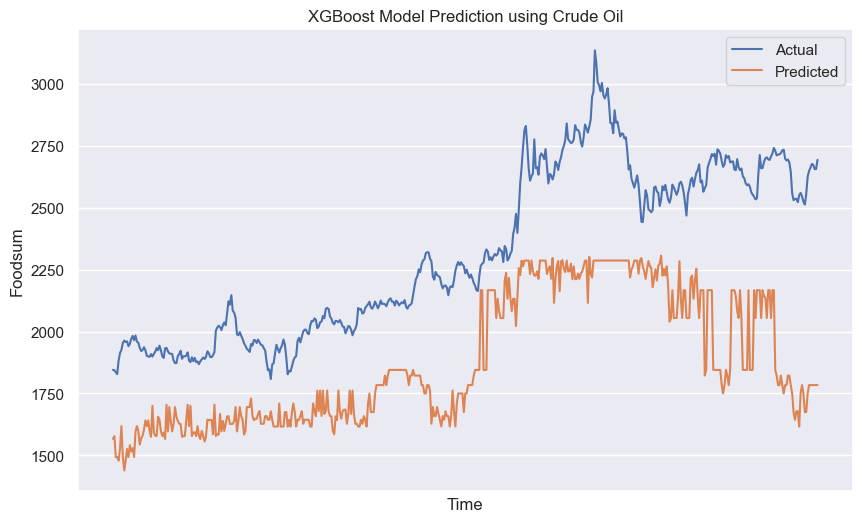

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Crude Oil

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['CL=F'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
R2 = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {R2}")


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Time')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction using Crude Oil')
plt.legend()
plt.xticks([])
plt.show()

The graph illustrates the predictive outcomes of food price using the XGBoost model by using crude oil as the predictor. Here, the blue line tracks the actual values, while the orange line charts the predicted values over time.

Examining the graph, we can see that the predicted graph (Foodsum) is close and follows the general trend of the graph of actual values of food prices (Foodsum).

Additionally, the Explained Variance value is 0.682891917446565, revealing the proportion of variance in the actual data explained by the XGBoost model which is high, suggesting a strong correlation and hence, Crude Oil is a good predictor to use to predict price of food.

In summary, both the graph and the provided metrics corroborate in saying that Crude Oil is a good predictor to use to predict price of food.

Mean Squared Error: 125946.84688342555
Explained Variance: 0.5339227212620725


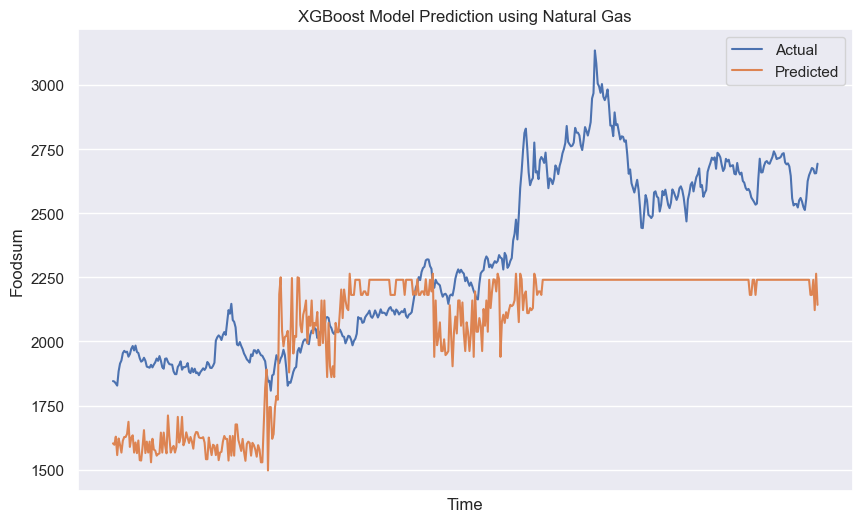

In [28]:
#Natural Gas

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['NG=F'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
R2 = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {R2}")


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Time')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction using Natural Gas')
plt.legend()
plt.xticks([])
plt.show()

The graph illustrates the predictive outcomes of food price using the XGBoost model by using natural gas as the predictor. Here, the blue line tracks the actual values, while the orange line charts the predicted values over time.

Examining the graph, we can see that the predicted graph (Foodsum) is close and follows the general trend of the graph of actual values of food prices (Foodsum). However, it can be noticed that the predicted values plateau towards the end suggesting a limitation in the model.

Additionally, the Explained Variance value is 0.5339227212620725, revealing the proportion of variance in the actual data explained by the XGBoost model which is high, suggesting a strong correlation and hence, Natural Gas is a good predictor to use to predict price of food.

In summary, both the graph and the provided metrics corroborate in saying that Natural Gas is a good predictor to use to predict price of food.

Mean Squared Error: 590313.9464610827
Explained Variance: -0.1035787353923141


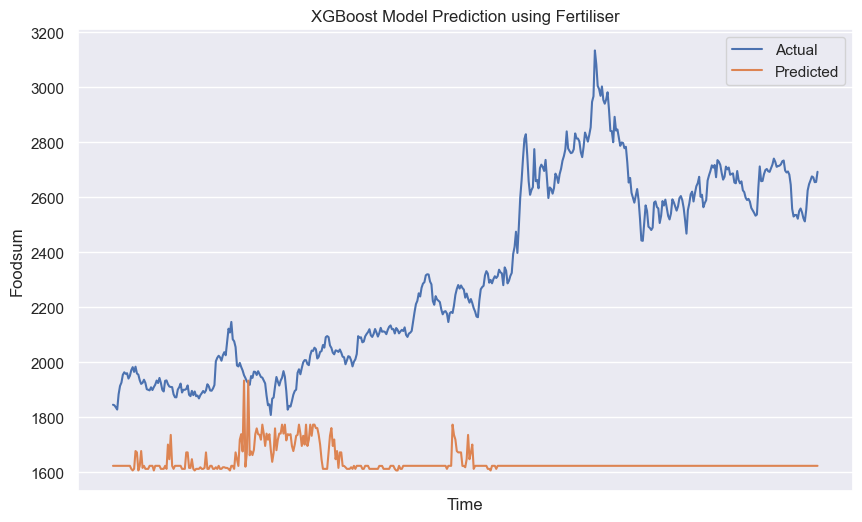

In [30]:
#Fertiliser

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['SQM'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
R2 = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {R2}")


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Time')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction using Fertiliser')
plt.legend()
plt.xticks([])
plt.show()

The graph illustrates the predictive outcomes of food price using the XGBoost model by using fertiliser as the predictor. Here, the blue line tracks the actual values, while the orange line charts the predicted values over time.

Examining the graph, we can see that the predicted graph (Foodsum) is not close and does not follow the general trend of the graph of actual values of food prices (Foodsum). However, it can be noticed that the predicted values plateau towards the end suggesting a limitation in the model.

Additionally, the Explained Variance value is -0.1035787353923141, suggesting there is no correlation and hence, Fertiliser is a not a good predictor to use to predict price of food. Alternatively, as explained varaiance cannot be negative, it might also be indicative of limitations on the model or the data used.

However based on the information we have, both the graph and the provided metrics corroborate in saying that Fertiliser is not a good predictor to use to predict price of food.

Mean Squared Error: 314156.04749324505
Explained Variance: -0.2030821344782252


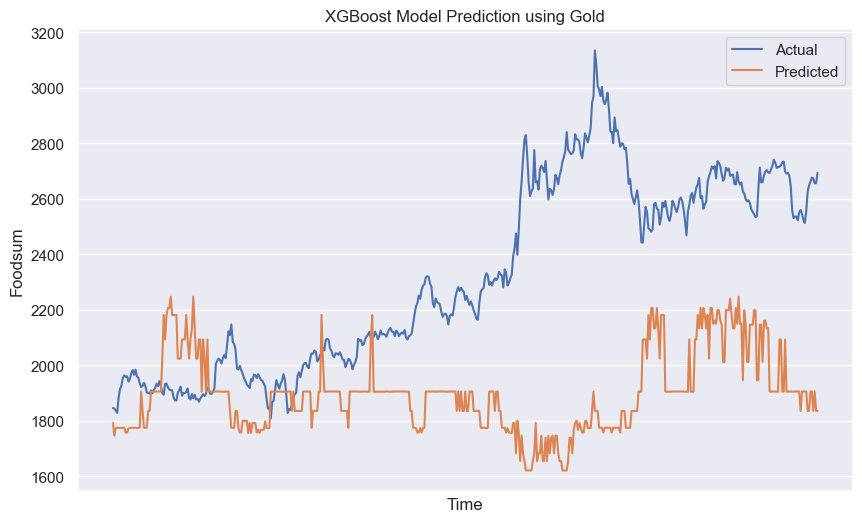

In [36]:
#Gold

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['GC=F'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
R2 = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {R2}")


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Time')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction using Gold')
plt.legend()
plt.xticks([])
plt.show()

The graph illustrates the predictive outcomes of food price using the XGBoost model by using gold(inlfation) as the predictor. Here, the blue line tracks the actual values, while the orange line charts the predicted values over time.

Examining the graph, we can see that the predicted graph (Foodsum) is not close and does not follow the general trend of the graph of actual values of food prices (Foodsum).

Additionally, the Explained Variance value is -0.2030821344782252, suggesting there is no correlation and hence, gold(inflation) is a not a good predictor to use to predict price of food. Alternatively, as explained varaiance cannot be negative, it might also be indicative of limitations on the model or the data used.

However based on the information we have, both the graph and the provided metrics corroborate in saying that Fertiliser is not a good predictor to use to predict price of food.

Mean Squared Error: 387376.10352344526
Explained Variance: -0.00042429770311236403


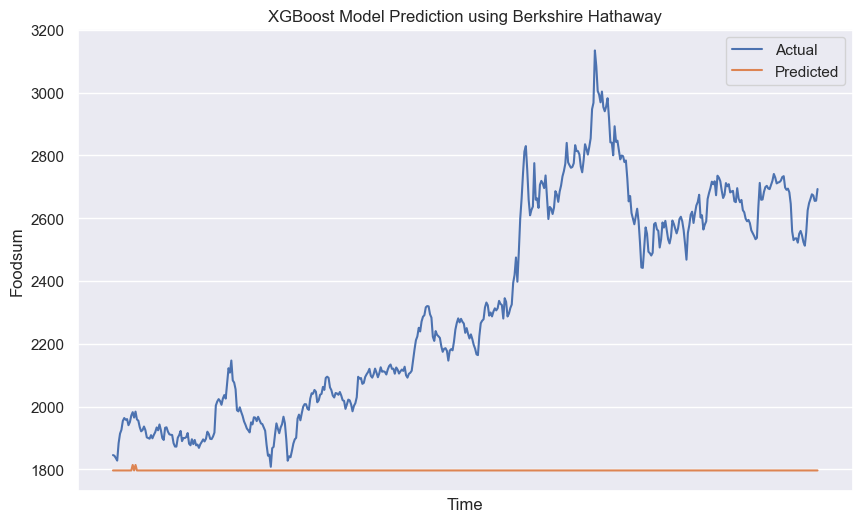

In [37]:
#Berkshire Hathaway

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['BRK-A'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
R2 = explained_variance_score(y_test, y_pred)
print(f"Explained Variance: {R2}")


# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Time')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction using Berkshire Hathaway')
plt.legend()
plt.xticks([])
plt.show()

The graph illustrates the predictive outcomes of food price using the XGBoost model by using Berkshire Hathaway as the predictor. Here, the blue line tracks the actual values, while the orange line charts the predicted values over time.

Examining the graph, we can see that the predicted graph (Foodsum) is not close and does not follow the general trend of the graph of actual values of food prices (Foodsum) and it can be noticed that the predicted values plateau suggesting a limitation in the model.

Additionally, the Explained Variance value is -0.00042429770311236403, suggesting there is no correlation and hence, Berkshire Hathaway is a not a good predictor to use to predict price of food. Alternatively, as explained varaiance cannot be negative, it might also be indicative of limitations on the model or the data used.

However based on the information we have, both the graph and the provided metrics corroborate in saying that Berkshire Hathaway is not a good predictor to use to predict price of food.

                   XGBoost Explained Variance
    Crude Oil:                0.68289

    Natural Gas:              0.53392

    Fertiliser:              -0.10358

    Gold:                    -0.20308

    Berkshire:               -0.00042
    
    
Above is the compiled list of explained variance for each of the XGBoost models using the different predictors. 


# Insights
### Conclusion, Limitations and recommendations


From the all the analysis made above, after narrowing down the predictors using Granger Causality Test and with the current state of the XGBoost model and data used, it can be concluded using the explained variance and closeness of the predicted and actual graph that crude oil and natural gas are the best predcitors in predicting food prices.


However, there are important limitations to take note of.

Firstly, as you can see some of the above graphs have plateaue before the end.
The observed plateau in the predicted graphs could stem from various factors:

1. Inadequate or irrelevant features: It's possible that the features employed for model training lack the comprehensive information needed for accurate long-term forecasts, resulting in diminished predictive accuracy over time.

2. Non-stationarity in the data: Fluctuations in the data's statistical properties over time may make it challenging for the model to maintain accurate predictions, as it struggles to adapt to evolving patterns especially considering global commodity prices experince a lot of noise due to external forces such as geopolitics making it volatile.

3. Model constraints: Like any machine learning model, XGBoost has inherent limitations in capturing intricate, nonlinear relationships and making precise long-term forecasts, especially in the face of data uncertainty or shifts in underlying dynamics.

While the flattening of the predicted curve doesn't necessarily denote an error, it does indicate diminishing reliability in the model's predictions beyond a certain point. (Recommendation) Addressing this may necessitate enhancements such as incorporating more pertinent features, employing advanced modeling methodologies, or frequently refreshing the model with recent data to enhance its ability to forecast accurately over extended periods.

Secondly, you can see that explained variance is negative for some predictors which should not be the case.
Several potential factors could contribute to this negative explained variance:

1. Overfitting: The model might be excessively fitting to the training data, resulting in subpar predictions on the test/validation data used to calculate this measure.

2. Irrelevant or redundant features: The features utilized for model training may lack relevance or informativeness to capture the underlying data patterns adequately, leading to diminished predictive accuracy.

3. Data quality issues: The training data itself could harbor quality concerns such as outliers, missing values, or noise, hindering the model's ability to learn effectively.

4. Inappropriate model settings: The XGBoost model's Hyperparameters, such as the learning rate or tree depth, or might not be appropriately tuned for this specific dataset and problem.

5. Target variable complexity: The target variable under prediction (in this instance, foodsum) may exhibit a highly intricate or non-linear relationship with the input features(such as gold), posing challenges for accurate capture by the XGBoost model.


(Recommendation) To enhance the model's performance and attain a positive explained variance, a reassessment of data preprocessing steps, feature engineering, model tuning, and validation approaches may be necessary. Techniques such as hyperparameter tuning, additional feature selection, outlier handling or experimenting with more sophisticated models could potentially alleviate this issue.

Thirdly, a significant portion of key data used are proxies such as Foodsum and fertiliser as a means to represent the actual values which do not have data representations. Therefore this might result in a lot of discrapencies and the model would not be able to accurately predict food price using the predictors. (Recommendation)Therefore, getting access to a better database to represent the predictors and price of food will help increase the accuracy of our results using this model.

References:

https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html

https://www.researchgate.net/post/What-is-the-explanation-of-negative-variance-in-the-statistical-models#:~:text=It%20is%20possible%20to%20get,allow%20it%20to%20be%20negative.

https://neptune.ai/blog/xgboost-everything-you-need-to-know

https://www.geeksforgeeks.org/xgboost/